# Bird Species Identifier - Binary Decision Tree Model

## Etape 1: chargée les données

Pour commencer on va charger les images de deux especes de oiseau, qu'on va utiliser pour entrainer notre model.

Species 1 images:
['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '015.jpg', '016.jpg', '017.jpg', '018.jpg', '019.jpg', '020.jpg', '021.jpg', '022.jpg', '023.jpg', '024.jpg', '025.jpg', '026.jpg', '027.jpg', '028.jpg', '029.jpg', '030.jpg', '031.jpg', '032.jpg', '033.jpg', '034.jpg', '035.jpg', '036.jpg', '037.jpg', '038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.jpg', '052.jpg', '053.jpg', '054.jpg', '055.jpg', '056.jpg', '057.jpg', '058.jpg', '059.jpg', '060.jpg', '061.jpg', '062.jpg', '063.jpg', '064.jpg', '065.jpg', '066.jpg', '067.jpg', '068.jpg', '069.jpg', '070.jpg', '071.jpg', '072.jpg', '073.jpg', '074.jpg', '075.jpg', '076.jpg', '077.jpg', '078.jpg', '079.jpg', '080.jpg', '081.jpg', '082.jpg', '083.jpg', '084.jpg', '085.jpg', '086.jpg', '087.jpg', '088.jpg', '089.jpg', '0

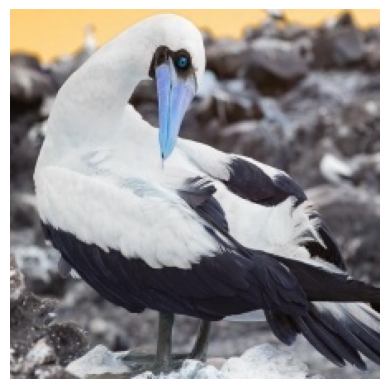

In [14]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the directory where your images are stored
species1_img_dir = r'C:\Users\nico-dev\Desktop\bdd\train\MASKED BOOBY'
species2_img_dir = r'C:\Users\nico-dev\Desktop\bdd\train\CRESTED COUA'

# Get the list of image file names
s1_image_names = os.listdir(species1_img_dir)
s2_image_names = os.listdir(species2_img_dir)

# Load the images of each species
s1_images = []
for image in s1_image_names:
    img = cv2.imread(os.path.join(species1_img_dir, image))
    s1_images.append(img)

s2_images = []
for image in s2_image_names:
    img = cv2.imread(os.path.join(species2_img_dir, image))
    s2_images.append(img)

# Print the loaded image names
print("Species 1 images:")
print(s1_image_names)

print("Species 2 images:")
print(s2_image_names)

plt.imshow(s1_images[0])
plt.axis('off')
plt.show()



### Chargement des jeux de test pour chaque espèce

In [18]:
# Define the directory where your images are stored
species1_img_dir_TEST = r'C:\Users\nico-dev\Desktop\bdd\test\MASKED BOOBY'
species2_img_dir_TEST = r'C:\Users\nico-dev\Desktop\bdd\test\CRESTED COUA'

# Get the list of image file names
s1_image_names_TEST = os.listdir(species1_img_dir_TEST)
s2_image_names_TEST = os.listdir(species2_img_dir_TEST)

# Load the images of each species
s1_images_TEST = []
for image in s1_image_names_TEST:
    img = cv2.imread(os.path.join(species1_img_dir_TEST, image))
    s1_images.append(img)

s2_images_TEST = []
for image in s2_image_names_TEST:
    img = cv2.imread(os.path.join(species2_img_dir_TEST, image))
    s2_images.append(img)

# Print the loaded image names
print("Species 1 images:")
print(s1_image_names_TEST)

print("Species 2 images:")
print(s2_image_names_TEST)

Species 1 images:
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
Species 2 images:
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']


Dans cette étape, nous avons traité les images. C'est une étape importante car elle peut affecter considérablement les performances de notre modèle.

Nous avons effectué deux opérations principales :

1. **Redimensionnement** : Nous avons redimensionné toutes les images pour qu'elles aient la même taille (224x224 pixels). C'est nécessaire car l'entrée d'un modèle d'apprentissage automatique doit toujours être de la même taille.

2. **Normalisation** : Nous avons normalisé les valeurs des pixels pour qu'elles soient comprises entre 0 et 1. Cela est généralement fait en divisant chaque valeur de pixel par 255 (puisque les valeurs RGB varient de 0 à 255). La normalisation aide à accélérer l'apprentissage du modèle et conduit souvent à de meilleures performances.

Notez que pour un modèle plus complexe, il pourrait être nécessaire d'ajouter des étapes supplémentaires, comme la suppression de l'arrière-plan.

In [23]:
import numpy as np

# Process species 1 images
processed_images_species1 = []
for img in s1_images:
    # Resize image to 224x224 pixels
    resized = cv2.resize(img, (224, 224))
    # Normalize pixel values
    normalized = resized / 255.0
    processed_images_species1.append(normalized)

# Convert the list to a numpy array
processed_images = np.array(processed_images_species1)

# Process species 2 images
processed_images_species2 = []
for img in s2_images:
    resized = cv2.resize(img, (224, 224))
    normalized = resized / 255.0
    processed_images_species2.append(normalized)

processed_images = np.concatenate((processed_images_species1, processed_images_species2))


In [24]:
# Get the length of the lists
num_s1_images = len(s1_images)
num_s2_images = len(s2_images)

# Create labels
s1_labels = [1] * num_s1_images # for species 1
s2_labels = [2] * num_s2_images # for species 2

# combiner les labels dans l'ordre des images
labels = s1_labels + s2_labels

Rappel

**Features** are the inputs to the model. In your case, the features are the processed images of birds. 

**Labels** are what we want the model to predict. In your case, the labels are the species of the birds.

Ici, `X_train` et `X_test` sont les features (images), et `y_train` and `y_test` sont les labels (espèces).

### Labelisation

In [25]:
# Get the length of the lists
num_s1_images = len(s1_images)
num_s2_images = len(s2_images)

# Create labels
s1_labels = [1] * num_s1_images # for species 1
s2_labels = [2] * num_s2_images # for species 2

# combiner les labels dans l'ordre des images
labels = s1_labels + s2_labels

### Construction du model

In [27]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Initialize the model
#clf = tree.DecisionTreeClassifier()

# Train the model
#clf = clf.fit(X_train, y_train)

# Predict on the test set
#predictions = clf.predict(X_test)

ValueError: Found array with dim 4. DecisionTreeClassifier expected <= 2.